<a href="https://colab.research.google.com/github/LagisettyRavikiran/LagisettyRavikiran/blob/main/RainFall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#% matplotlib inline
import seaborn as sns ; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
data.columns
data.shape
data=data.dropna()

In [5]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000
mean,14.866713,24.064319,2.430029,5.521941,7.826799,40.684533,17.709731,19.686621,65.720173,53.652234,1017.937074,1015.500668,4.004733,4.234860,19.260281,22.661910,2.816776
std,5.293083,5.405232,7.315551,4.199801,3.698601,12.052673,7.606881,8.058765,15.955546,21.034930,5.900258,5.818925,2.767814,2.549722,4.596342,5.262796,9.425796
min,-3.300000,9.400000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,6.000000,1.000000,980.500000,979.000000,0.000000,0.000000,4.000000,8.200000,0.000000
25%,12.000000,20.000000,0.000000,3.000000,5.500000,31.000000,13.000000,13.000000,56.000000,36.000000,1014.100000,1011.800000,1.000000,2.000000,16.500000,18.700000,0.000000
50%,15.600000,23.400000,0.000000,4.600000,8.900000,39.000000,17.000000,19.000000,66.000000,57.000000,1018.000000,1015.600000,4.000000,4.000000,19.600000,21.900000,0.000000
75%,18.900000,26.900000,1.000000,7.000000,10.600000,48.000000,22.000000,24.000000,77.000000,69.000000,1021.900000,1019.500000,7.000000,7.000000,22.600000,25.500000,1.000000
max,29.100000,47.300000,128.000000,65.400000,14.000000,117.000000,50.000000,54.000000,100.000000,99.000000,1035.300000,1033.600000,8.000000,8.000000,37.300000,45.800000,153.200000


In [7]:
data.RainToday.value_counts()

No     5486
Yes    1697
Name: RainToday, dtype: int64

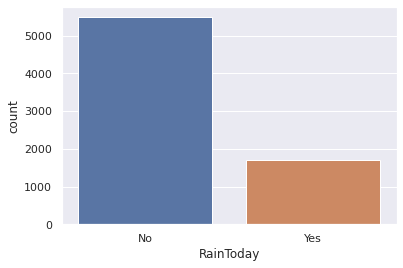

In [8]:
g=sns.countplot(x='RainToday',data=data)

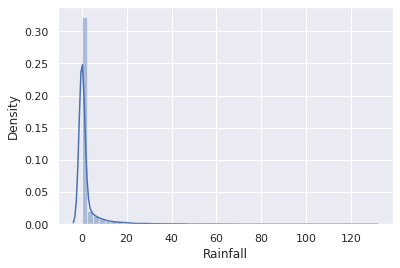

In [9]:
g=sns.distplot(data['Rainfall'])

In [10]:
data['RainToday']=data['RainToday'].apply(lambda x:1 if x=='Yes' else 0)
train=data[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RISK_MM']]
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x:1 if x=='Yes' else 0)
label=data['RainTomorrow']

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
x_train , y_train , x_test , y_test = train_test_split(train,label,test_size=0.6)  

LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
mod1 = LogisticRegression()

In [18]:
mod1.fit(x_train,x_test)

LogisticRegression()

In [19]:
lf=mod1.predict(y_train)

In [20]:
acc=accuracy_score(y_test,lf)
acc

0.9842227378190255

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cn=confusion_matrix(y_test,lf)

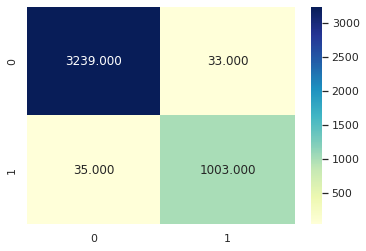

In [23]:
labels = [0,1]
sns.heatmap(cn, annot=True, cmap="YlGnBu",fmt=".3f",xticklabels=labels,yticklabels=labels)
plt.show()

RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
mod2=RandomForestClassifier()

In [26]:
mod2.fit(x_train,x_test)

RandomForestClassifier()

In [27]:
RF=mod2.predict(y_train)

In [28]:
acc1 = accuracy_score(y_test,RF)
acc1

1.0

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cn1 = confusion_matrix(y_test,mod2.predict(y_train))

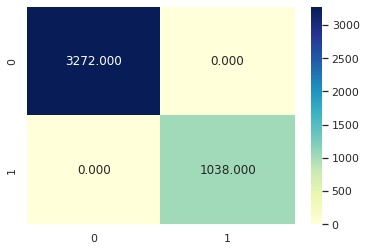

In [31]:
labels = [0,1]
sns.heatmap(cn1, annot=True, cmap="YlGnBu",fmt=".3f",xticklabels=labels,yticklabels=labels)
plt.show()

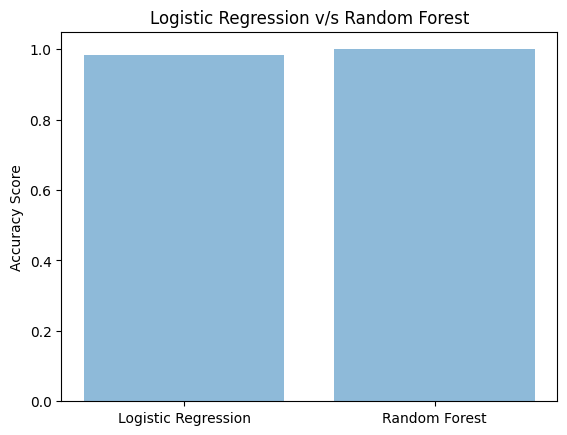

In [32]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Logistic Regression','Random Forest')
y_pos=np.arange(len(objects))
performance=[acc,acc1]

plt.bar(y_pos,performance,align='center',alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Accuracy Score')
plt.title('Logistic Regression v/s Random Forest')
plt.show()